,Customer_ID,CLTV,Churn_Prob,Revenue_Risk
2750,18102.0,34167.557038,1.00,34167.557038
1078,14646.0,25045.503453,1.00,25045.503453
829,14156.0,19602.967240,1.00,19602.967240
1206,14911.0,14888.435134,0.98,14590.666431
603,13694.0,13289.962424,1.00,13289.962424
708,13902.0,13526.923804,0.94,12715.308376
2083,16754.0,8887.555967,1.00,8887.555967
2460,17511.0,8362.473455,1.00,8362.473455
2049,16684.0,8346.182287,1.00,8346.182287
1271,15061.0,8193.746280,1.00,8193.746280


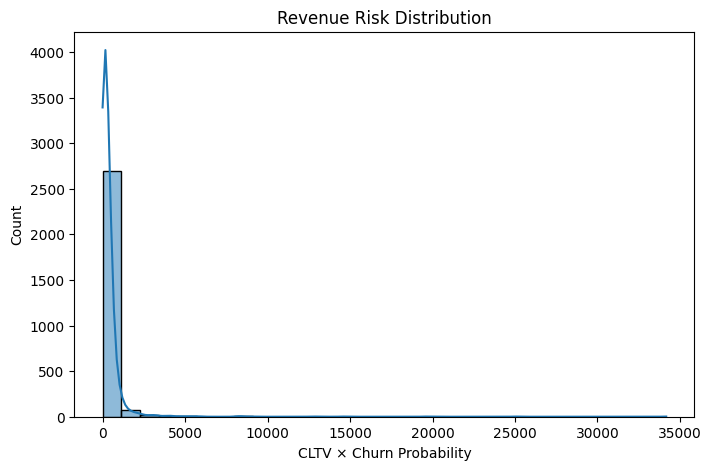

✅ Saved: cltv_with_churn_risk.csv and high_risk_customers.csv


In [1]:
# 📁 notebooks/7_revenue_risk_model.ipynb

import pandas as pd
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

# 📌 Step 1: Load Data
cltv = pd.read_csv('cltv_dataset.csv')

# 📌 Step 2: Load Trained Churn Model
model = joblib.load('E:/c drive/amazon/models/churn_model.pkl')

# 📌 Step 3: Predict Churn Probabilities
features = ['Frequency', 'Recency', 'Monetary', 'AOV', 'PF', 'CLTV']
cltv['Churn_Prob'] = model.predict_proba(cltv[features])[:, 1]

# 📌 Step 4: Calculate Revenue Risk Score
cltv['Revenue_Risk'] = cltv['CLTV'] * cltv['Churn_Prob']

# 📊 Step 5: View Top At-Risk Customers
high_risk = cltv.sort_values('Revenue_Risk', ascending=False).head(15)
display(high_risk[['Customer_ID', 'CLTV', 'Churn_Prob', 'Revenue_Risk']])

# 📈 Optional: Visualize
plt.figure(figsize=(8,5))
sns.histplot(cltv['Revenue_Risk'], bins=30, kde=True)
plt.title("Revenue Risk Distribution")
plt.xlabel("CLTV × Churn Probability")
plt.show()

# 💾 Step 6: Save Output
cltv.to_csv("cltv_with_churn_risk.csv", index=False)
high_risk.to_csv("high_risk_customers.csv", index=False)

print("✅ Saved: cltv_with_churn_risk.csv and high_risk_customers.csv")


In [3]:
# 📦 Retention Strategy Actions Based on Revenue Risk, CLTV, and Recency

import pandas as pd

# Load the existing CLTV + Churn file with Revenue_Risk column
cltv = pd.read_csv('cltv_with_churn_risk.csv')

# 🎁 1. Retention Offers: Flag high revenue risk customers
cltv['Retention_Offer_Flag'] = cltv['Revenue_Risk'].apply(lambda x: 1 if x > 3000 else 0)

# 📞 2. High-Touch VIP Service: High CLTV + High Churn
cltv['VIP_Service_Flag'] = cltv.apply(
    lambda row: 1 if (row['CLTV'] > 3000 and row['Churn_Prob'] > 0.8) else 0,
    axis=1
)

# ⏳ 3. Time-Based Campaigns: High recency and decent CLTV
cltv['Time_Based_Trigger'] = cltv['Recency'].apply(lambda x: 1 if x > 90 else 0)

# 📉 4. Monitor Drop-Off: Low Frequency + High Recency
cltv['Potential_DropOff'] = cltv.apply(
    lambda row: 1 if (row['Frequency'] <= 2 and row['Recency'] > 90) else 0,
    axis=1
)

# ✅ Export segments for business actions
cltv[cltv['Retention_Offer_Flag'] == 1].to_csv('retention_targets.csv', index=False)
cltv[cltv['VIP_Service_Flag'] == 1].to_csv('vip_followups.csv', index=False)
cltv[(cltv['Time_Based_Trigger'] == 1) & (cltv['CLTV'] > 1000)].to_csv('urgent_time_campaign.csv', index=False)
cltv[cltv['Potential_DropOff'] == 1].to_csv('monitor_dropoff_customers.csv', index=False)

print("🎯 All retention action files generated:")
print("- retention_targets.csv")
print("- vip_followups.csv")
print("- urgent_time_campaign.csv")
print("- monitor_dropoff_customers.csv")


🎯 All retention action files generated:
- retention_targets.csv
- vip_followups.csv
- urgent_time_campaign.csv
- monitor_dropoff_customers.csv
